## 6.6 Sourcing & Analyzing Time Series Data

### 1. Importing libraries and data

### 2. Subsetting, wrangling, and cleaning data

### 3. Decomposition

### 4. Dickey-Fuller test for stationarity

### 1. Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

In [2]:
# Ensure the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path

path = r'C:\Users\Frederick\Documents\17-12-2023 World University Rankings'

In [4]:
# Import data for shanghai ranking

shanghai = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'shanghai.csv'), index_col = False)

### 2. Subsetting, wrangling and cleaning data

### For this exercise, I will use the shanghai ranking dataset. The main reason being it covers across more years than Times ranking and CWUR ranking (i.e. from 2005 to 2015). Specifically, I will look at the average ranking scores for United States, as it has the most universities in the world ranking dataset (i.e. total of 584 records!).  

In [5]:
shanghai.columns

Index(['Unnamed: 0', 'world_rank', 'university_name', 'country',
       'national_rank', 'total_score', 'alumni', 'award', 'cited_research',
       'articles', 'science_citation', 'capita', 'year'],
      dtype='object')

In [6]:
shanghai.shape

(4896, 13)

In [7]:
# Checking for missing values in shanghai ranking dataframe

shanghai.isnull().sum() # All missing values in total score will be removed. 

Unnamed: 0             0
world_rank             0
university_name        0
country             1490
national_rank          0
total_score         3795
alumni                 0
award                  1
cited_research         1
articles              21
science_citation       1
capita                 1
year                   0
dtype: int64

In [8]:
# Creating a subset in without missing total scores in shanghai dataframe 

shanghai_sub = shanghai[shanghai['total_score'].isnull() == False]

In [9]:
# Checking output of the times subset

shanghai_sub.shape # Count is correct after removing missing total scores

(1101, 13)

In [10]:
# Create a subset for Shanghai ranking with only total score, country and year 

shanghai_sub2 = shanghai_sub[['country', 'total_score', 'year']]

In [11]:
shanghai_sub2.head()

,country,total_score,year
0,United States of America,100.0,2005
1,United Kingdom,73.6,2005
2,United States of America,73.4,2005
3,United States of America,72.8,2005
4,United States of America,70.1,2005


In [12]:
# Checking country counts in the ranking dataset

shanghai_sub2['country'].value_counts(dropna = False)

country
United States of America    584
United Kingdom              111
Germany                      53
Japan                        50
Canada                       44
France                       39
Switzerland                  39
Australia                    37
Sweden                       37
Netherlands                  27
Denmark                      19
Israel                       17
Russia                       11
Norway                       11
Finland                      11
Belgium                       8
Italy                         2
Austria                       1
Name: count, dtype: int64

### United States has the most universities in the shanghai world university ranking. Hence I will select United States and look at the average ranking scores across the years.

In [13]:
# Create a subset that only contains united states

shanghai_us = shanghai_sub2.loc[shanghai_sub2['country'] == 'United States of America']

In [14]:
shanghai_us.head(10)

,country,total_score,year
0,United States of America,100.0,2005
2,United States of America,73.4,2005
3,United States of America,72.8,2005
4,United States of America,70.1,2005
5,United States of America,67.1,2005
6,United States of America,62.3,2005
7,United States of America,60.9,2005
8,United States of America,60.1,2005
10,United States of America,56.9,2005
11,United States of America,54.6,2005


In [15]:
# Finding average ranking scores for US by year

shanghai_us['average score'] = shanghai_us.groupby(['year'])['total_score'].transform(np.mean)

C:\Users\Frederick\AppData\Local\Temp\ipykernel_19568\550320193.py:3: FutureWarning: The provided callable <function mean at 0x000002A185B7C860> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  shanghai_us['average score'] = shanghai_us.groupby(['year'])['total_score'].transform(np.mean)
C:\Users\Frederick\AppData\Local\Temp\ipykernel_19568\550320193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_us['average score'] = shanghai_us.groupby(['year'])['total_score'].transform(np.mean)


In [16]:
# Checking output

shanghai_us

,country,total_score,year,average score
0,United States of America,100.0,2005,41.135849
2,United States of America,73.4,2005,41.135849
3,United States of America,72.8,2005,41.135849
4,United States of America,70.1,2005,41.135849
5,United States of America,67.1,2005,41.135849
...,...,...,...,...
4488,United States of America,24.5,2015,40.009804
4489,United States of America,24.5,2015,40.009804
4490,United States of America,24.5,2015,40.009804
4494,United States of America,24.0,2015,40.009804


In [17]:
# Create a subset that only contains year and average score

shanghai_us2 = shanghai_us[['year','average score']]

In [18]:
# Dropping duplicates on year

shanghai_us3 = shanghai_us2.drop_duplicates()

In [19]:
# Checking output

shanghai_us3

,year,average score
0,2005,41.135849
500,2006,40.562963
1000,2007,40.544444
1510,2008,40.462963
2013,2009,39.978182
2514,2010,40.257407
3014,2011,40.675472
3514,2012,40.588679
3798,2013,41.037255
3896,2014,40.194231


In [20]:
# Set the "year" column as the index

from datetime import datetime

shanghai_us3['Year'] = pd.to_datetime(shanghai_us3['year'], format='%Y') # Create a datetime column from "Date.""
shanghai_us3 = shanghai_us3.set_index('Year') # Set the datetime as the index of the dataframe.
shanghai_us3.drop(['year'], axis=1, inplace=True) # Drop the "Date" column.
shanghai_us3.head()

C:\Users\Frederick\AppData\Local\Temp\ipykernel_19568\3372281661.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_us3['Year'] = pd.to_datetime(shanghai_us3['year'], format='%Y') # Create a datetime column from "Date.""


,average score
Year,
2005-01-01,41.135849
2006-01-01,40.562963
2007-01-01,40.544444
2008-01-01,40.462963
2009-01-01,39.978182


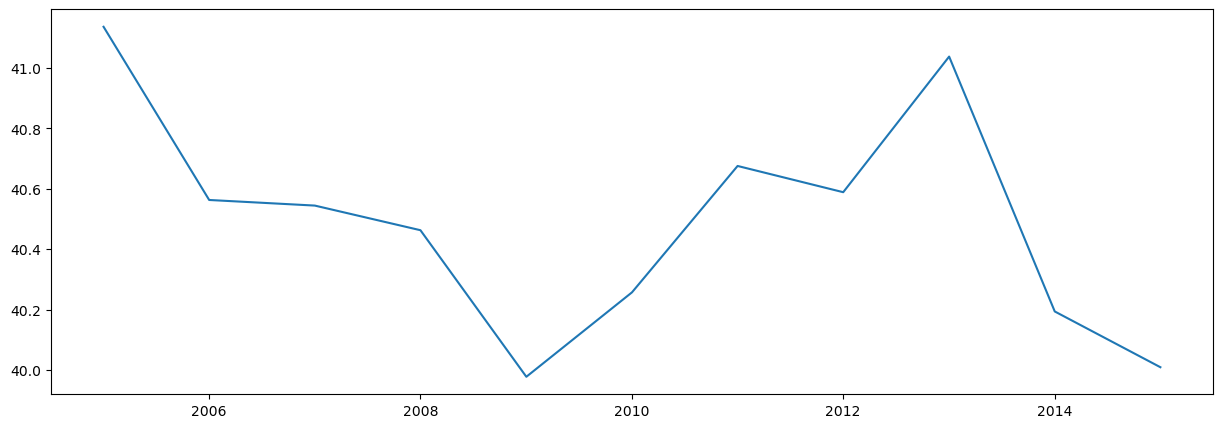

In [21]:
# Plot the line chart

plt.figure(figsize=(15,5), dpi=100)
plt.plot(shanghai_us3)

 ### 3. Decomposition

In [22]:
# Decompose the US average ranking time series using an additive model

decomposition = sm.tsa.seasonal_decompose(shanghai_us3, model='additive')

In [23]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

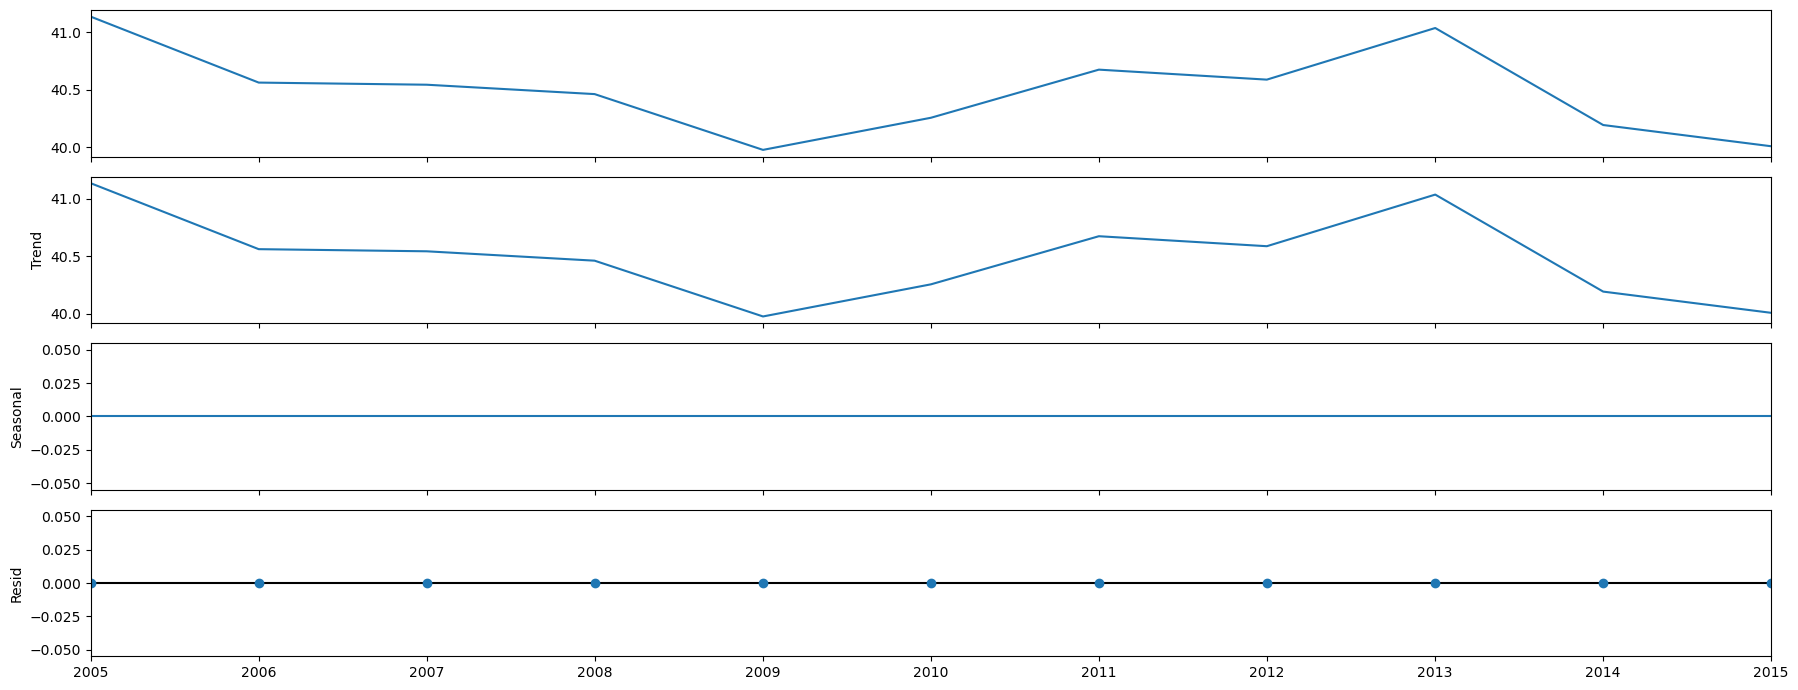

In [24]:
# Plot the separate time series components

decomposition.plot()
plt.show()

### From the above decomposition chart, it appears that the underlying trend is the same as the level. Furthermore, there are no seasonality or noise as well. This is not surprising because the world universties ranking score can be cosidered as stable, it won't have big fluctuations year by year. Therefore, there hasn't been a need to smooth the data in this case.  

 ### 3. Dickey-Fuller test for stationairty

In [27]:
# Import the adfuller() function

from statsmodels.tsa.stattools import adfuller

# Define the function and perform the Dickey-Fuller test

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series

dickey_fuller(shanghai_us3['average score'])

Dickey-Fuller Stationarity test:
Test Statistic                -4.162094
p-value                        0.000763
Number of Lags Used            3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


### Based on the Dickey-Fuller test, the test statistis is -4.162094 and at a significance level of 5 percent (i.e. Cricical value 5%), the value is -3.477583. This means that the test statistics is smaller than the criical value at 5%, and therefore I can reject the null hypothesis that there is a unit root, and conclude that the data is stationary.

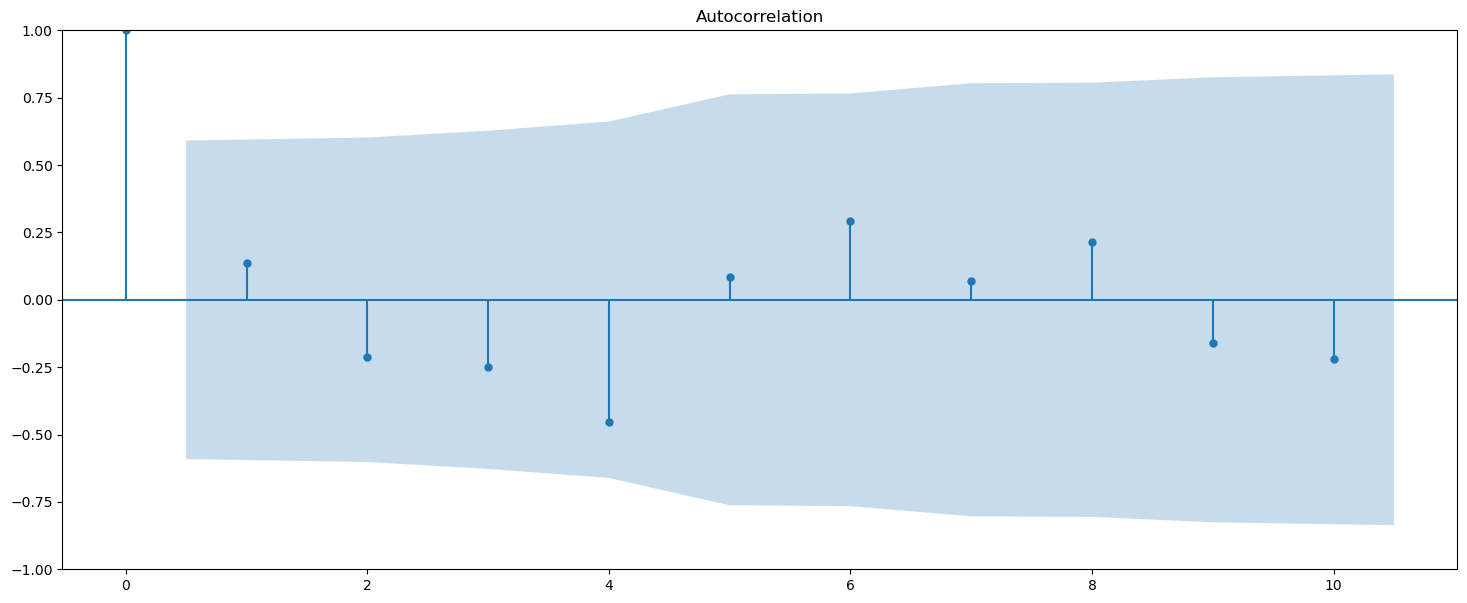

In [26]:
# Check for autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(shanghai_us3)
plt.show()

### The above graph shows that there's no lines that go above the blude edge/confidence level. This means that the lags are not correlated with each other, and the  dataset for average US ranking score is likely non-stationary. This, in conjunction with the Dickey-Fuller test, means that no futher stationairizing on the data is required